<a href="https://colab.research.google.com/github/redhatrahul/aiwinter1920/blob/master/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#handling data
import pandas as pd

In [0]:
#loading datasets 
df=pd.read_csv('https://raw.githubusercontent.com/redhatrahul/aiwinter1920/master/mallanalysis.csv')

In [8]:
#printing top 5 data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#by annual analysis we have to decide the right column
useful_data=df.iloc[:,[3,4]].values

In [0]:
#now finding no of clusters and analysing it by ELblow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
#analysing KMeans
#KMeans()
wcss=[]
#lets assume max no of cluster is 10
for i in range(1,11):
  #k-means++ algo is being used
  mykm=KMeans(n_clusters=i)
  #now applying this state to data
  mykm.fit(useful_data)
  wcss.append(mykm.inertia_)#here inertia_ means --summary of formula
  print(wcss)


[269981.28]
[269981.28, 181363.59595959596]
[269981.28, 181363.59595959596, 106348.37306211118]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30227.606513152015]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30227.606513152015, 25062.433792653777]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30227.606513152015, 25062.433792653777, 22874.05534759358]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30227.606513152015, 25062.433792653777, 22874.05534759358, 19704.123543147773]


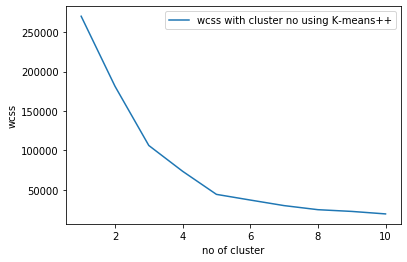

In [16]:
#plotting graph no of cluster vs wcss
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.plot(range(1,11),wcss,label="wcss with cluster no using K-means++")
plt.legend()
plt.show()

In [0]:
#now we can assume no of cluster as 5
#again calling no of clusters 
per_cls=KMeans(n_clusters=5) 

In [0]:
#now applying data for clustering 
predictcls=per_cls.fit_predict(useful_data)

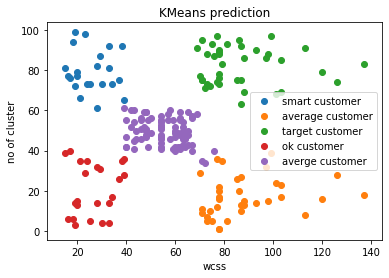

In [24]:
#now visual output
plt.xlabel('wcss')
plt.ylabel('no of cluster')
plt.title('KMeans prediction')
#for cluster 0
#0=annual salary
#1=score
plt.scatter(useful_data[predictcls == 0 , 0],useful_data[predictcls == 0 , 1],label="smart customer")
plt.scatter(useful_data[predictcls == 1 , 0],useful_data[predictcls == 1 , 1],label="average customer")
plt.scatter(useful_data[predictcls == 2 , 0],useful_data[predictcls == 2 , 1],label="target customer")
plt.scatter(useful_data[predictcls == 3 , 0],useful_data[predictcls == 3 , 1],label="ok customer")
plt.scatter(useful_data[predictcls == 4 , 0],useful_data[predictcls == 4 , 1],label="averge customer")
plt.legend()
plt.show()